# Importing Modules

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

# Loading Mnist Data

In [2]:
(inp_data,out_data),(inp_test,out_test) = mnist.load_data()
inp_data=inp_data.astype('float')/255.
inp_test=inp_test.astype('float')/255.

# Reshaping Loaded Data Images

In [3]:
inp_data = np.reshape(inp_data, (60000, 784))
inp_test= np.reshape(inp_test,(10000, 784))

# Visualizing Initial Data

In [4]:
def Plot_image(x,y):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(x[i].reshape(28,28))
        plt.title("Label:" + str(y[i]))
        plt.axis("off")
    plt.show()

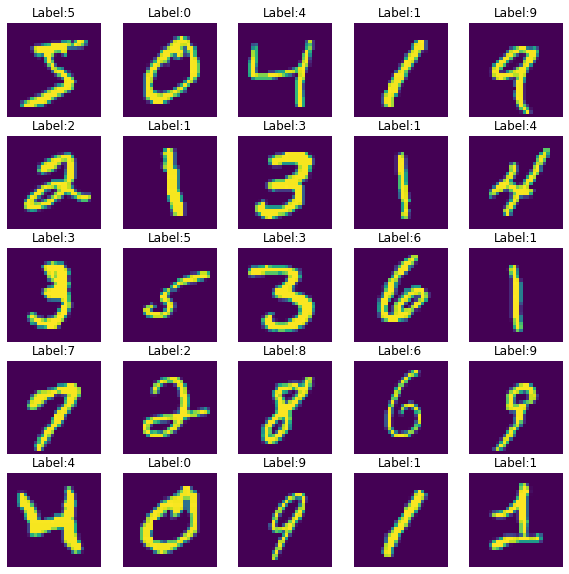

In [5]:
Plot_image(inp_data,out_data)

# Adding Noise to the Images

In [6]:
noise_train=inp_data + np.random.rand(60000, 784)*0.9
noise_test=inp_test + np.random.rand(10000, 784)*0.9
noise_train=np.clip(noise_train, 0., 1.)
noise_test=np.clip(noise_test, 0., 1.)

# Visualizing Noise added Images

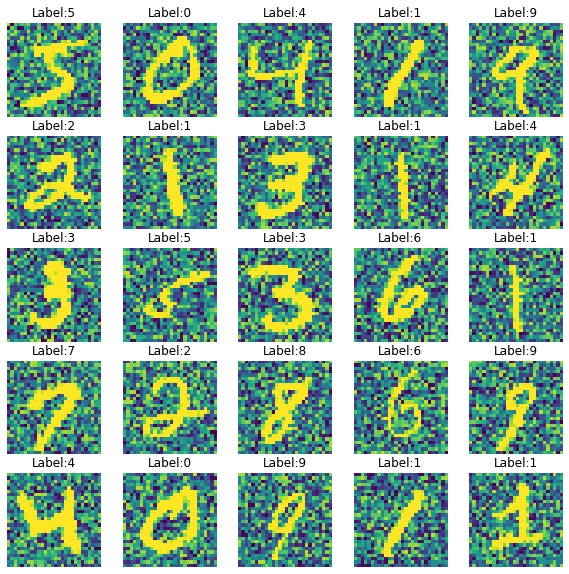

In [7]:
Plot_image(noise_train,out_data)

# Building And Training of a Classifier

In [8]:
classifier = Sequential([
    Dense(256, activation = 'relu', input_shape = (784,)),
    Dense(256, activation = 'relu'),
    Dense(256, activation = 'softmax')])

In [9]:
classifier.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
classifier.fit(inp_data,out_data,batch_size = 512, epochs = 3)

Epoch 1/3
118/118 [==============================] - 1s 9ms/step - loss: 1.6600 - accuracy: 0.6449
Epoch 2/3
118/118 [==============================] - 1s 10ms/step - loss: 0.2216 - accuracy: 0.9368
Epoch 3/3
118/118 [==============================] - 1s 7ms/step - loss: 0.1539 - accuracy: 0.9554


# Checking Accuracy of the Classifier

In [10]:
data_loss,data_accuracy = classifier.evaluate(inp_test,out_test)
print("Training Data: ",data_accuracy*100)
noise_loss,noise_accuracy = classifier.evaluate(noise_test,out_test)
print("Noise added Training Data: ",noise_accuracy*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1341 - accuracy: 0.9599
Training Data:  95.99000215530396
313/313 [==============================] - 0s 801us/step - loss: 13.1950 - accuracy: 0.1084
Noise added Training Data:  10.840000212192535


# Building and Compiling an Auto-encoder

In [11]:
input_image = Input(shape = (784,))
encoded = Dense(64, activation = 'relu')(input_image)
decoded = Dense(784, activation = 'sigmoid')(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')

# Training an Auto-encoder

In [12]:
autoencoder.fit(
    noise_train, 
    inp_data,
    epochs = 100,
    batch_size = 512,
    validation_split = 0.2,
    verbose = False,
    callbacks = [
        EarlyStopping(monitor = 'val_loss', patience = 5),
        LambdaCallback(on_epoch_end = lambda e,l: print('Loss Calculated: {:.3f}'.format(l['val_loss']), end = '\n'))
    ]
)

print('\n\n')
print('Training is complete!')

Loss Calculated: 0.259
Loss Calculated: 0.240
Loss Calculated: 0.211
Loss Calculated: 0.191
Loss Calculated: 0.178
Loss Calculated: 0.169
Loss Calculated: 0.162
Loss Calculated: 0.156
Loss Calculated: 0.151
Loss Calculated: 0.146
Loss Calculated: 0.142
Loss Calculated: 0.138
Loss Calculated: 0.135
Loss Calculated: 0.133
Loss Calculated: 0.131
Loss Calculated: 0.129
Loss Calculated: 0.127
Loss Calculated: 0.126
Loss Calculated: 0.124
Loss Calculated: 0.123
Loss Calculated: 0.121
Loss Calculated: 0.120
Loss Calculated: 0.120
Loss Calculated: 0.119
Loss Calculated: 0.119
Loss Calculated: 0.118
Loss Calculated: 0.118
Loss Calculated: 0.117
Loss Calculated: 0.117
Loss Calculated: 0.117
Loss Calculated: 0.117
Loss Calculated: 0.117
Loss Calculated: 0.117
Loss Calculated: 0.117
Loss Calculated: 0.116
Loss Calculated: 0.116
Loss Calculated: 0.116
Loss Calculated: 0.116
Loss Calculated: 0.116
Loss Calculated: 0.116
Loss Calculated: 0.116
Loss Calculated: 0.116
Loss Calculated: 0.116
Loss Calcul

# Predicting denoised Images

In [13]:
denoised_images=autoencoder.predict(noise_test)

# Plotting denoised Images

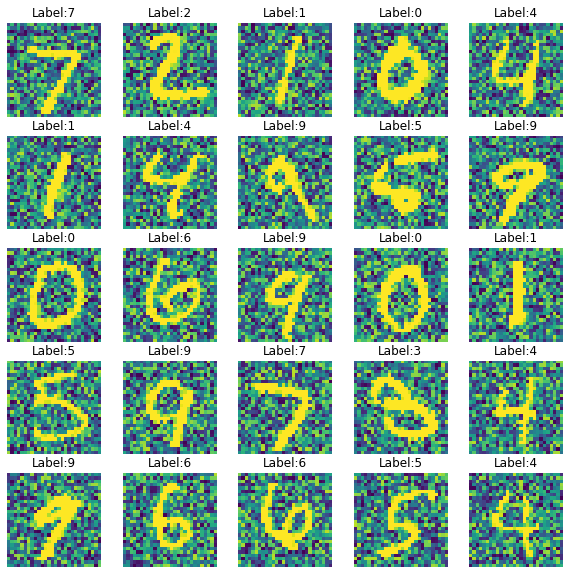

In [14]:
Plot_image(noise_test,out_test)

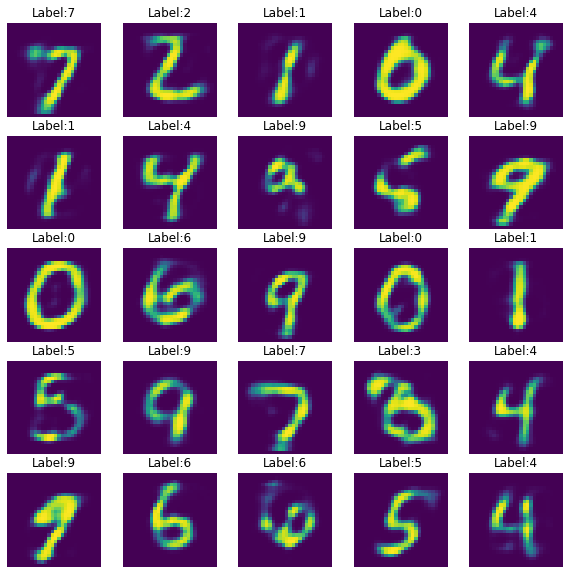

In [15]:
Plot_image(denoised_images,out_test)

# Checking Accuracy Now

In [16]:
test_loss,test_accuracy = classifier.evaluate(denoised_images,out_test)
print("Final Accuracy: ", test_accuracy*100)

313/313 [==============================] - 0s 849us/step - loss: 0.2380 - accuracy: 0.9249
Final Accuracy:  92.48999953269958
